In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

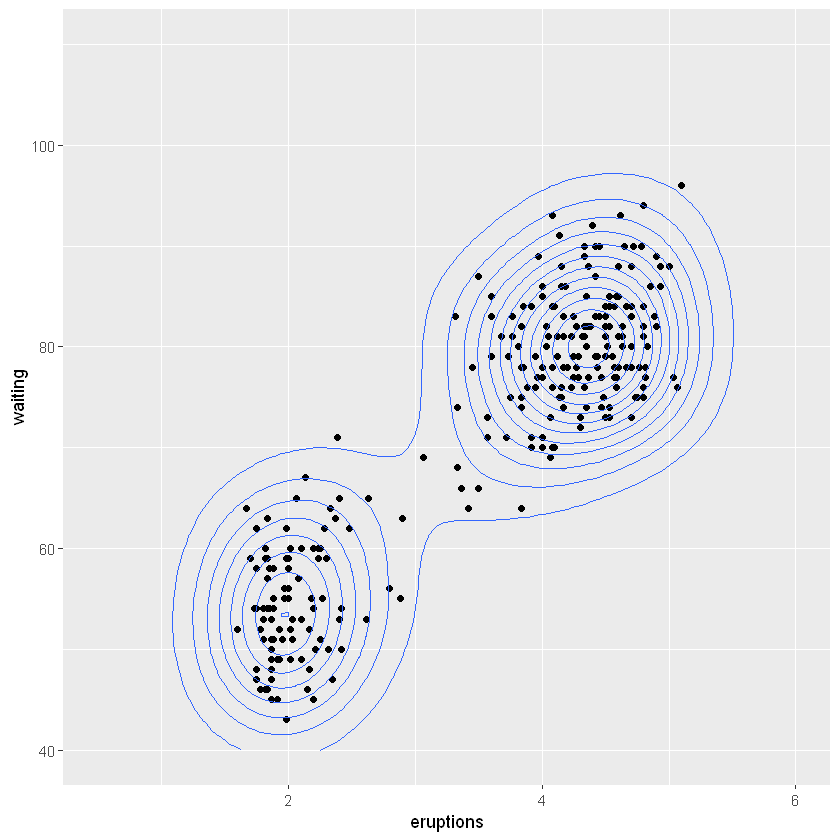

In [2]:
m <- ggplot(faithful, aes(x = eruptions, y = waiting)) +
  geom_point() +
  xlim(0.5, 6) +
  ylim(40, 110)
m + geom_density_2d()

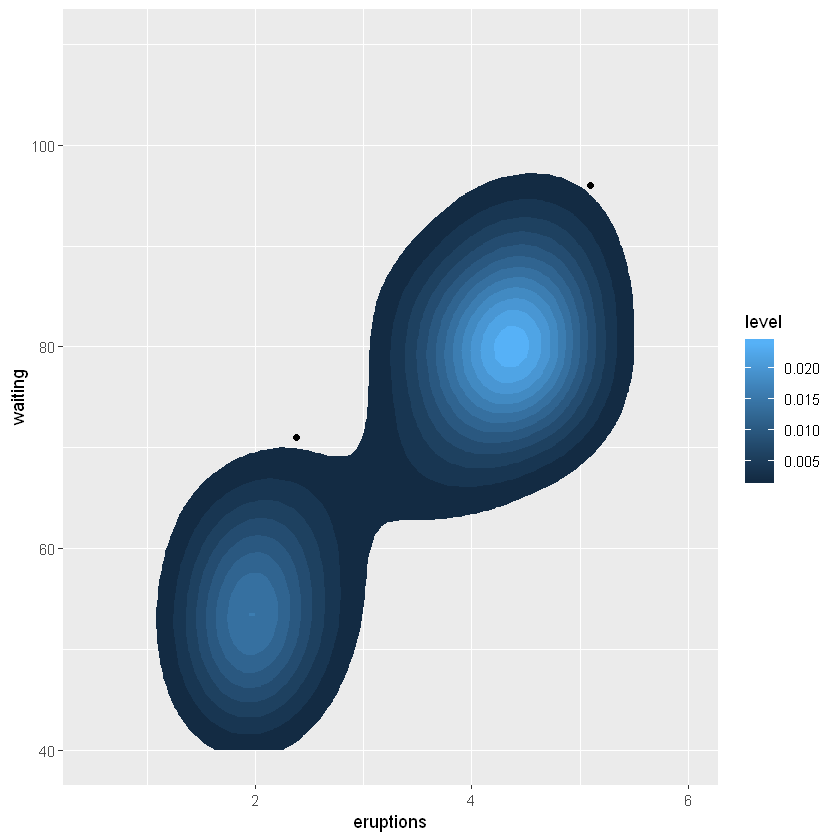

In [3]:
m + stat_density_2d(aes(fill = stat(level)), geom = "polygon")

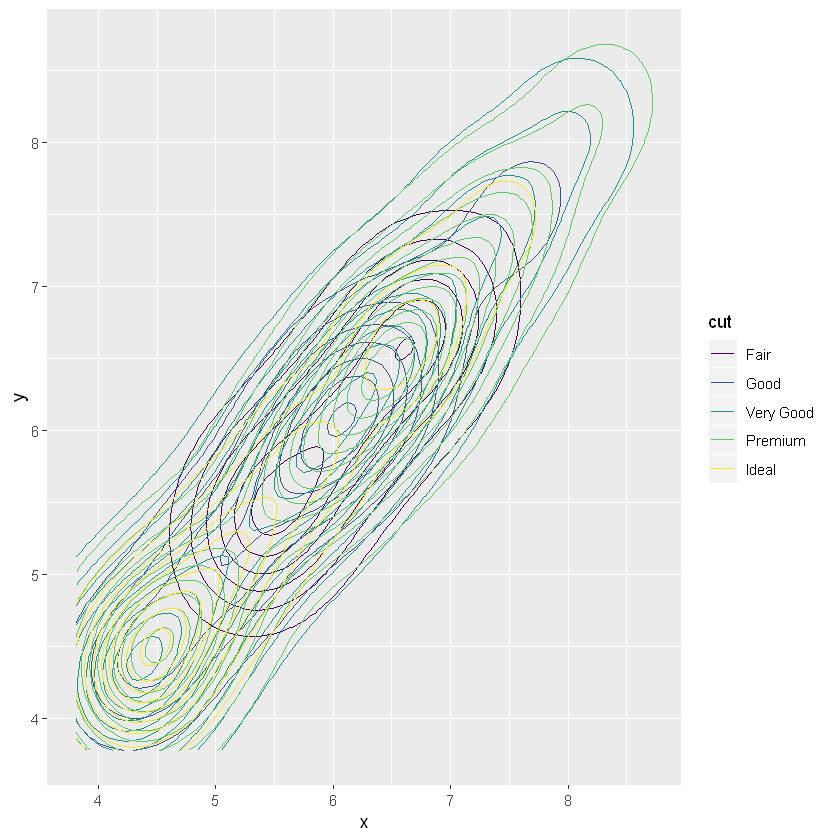

In [4]:
set.seed(4393)
dsmall <- diamonds[sample(nrow(diamonds), 1000), ]
d <- ggplot(dsmall, aes(x, y))

# If an aesthetic is mapped to a categorical variable, a set of
# contours for each value of that variable is obtained

d + geom_density_2d(aes(colour = cut))

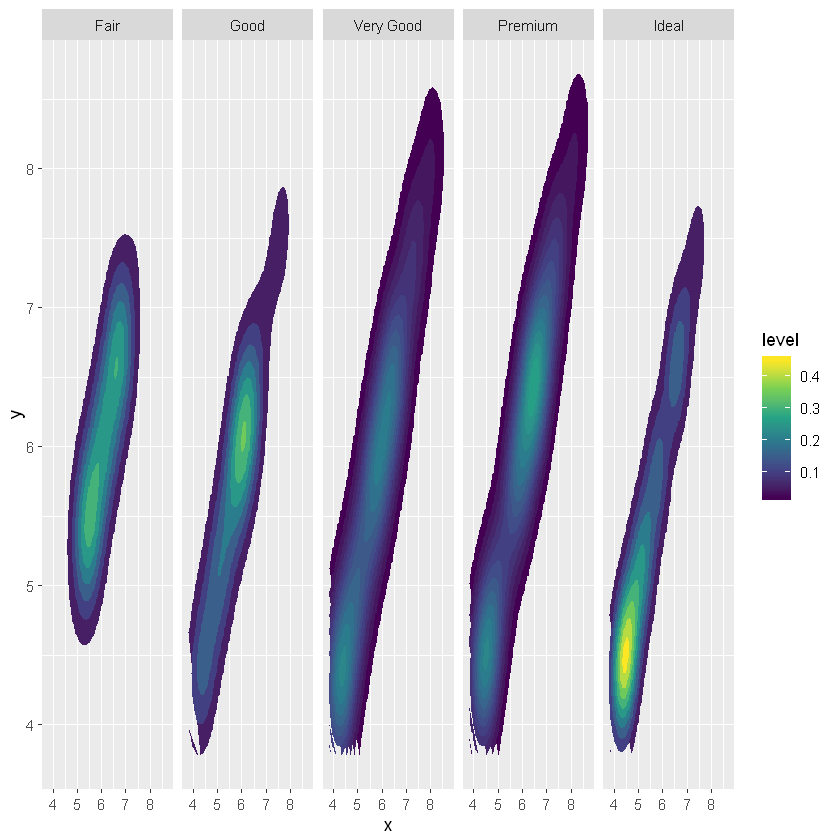

In [5]:
# Similarly, if faceting is applied to the plot, contours will
# be drawn for each facet, but the levels will be calculated
# across all facets

d + stat_density_2d(aes(fill = stat(level)), geom = "polygon") +
  facet_grid(. ~ cut) + scale_fill_viridis_c()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'nlevel' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot(x)
19. by_la

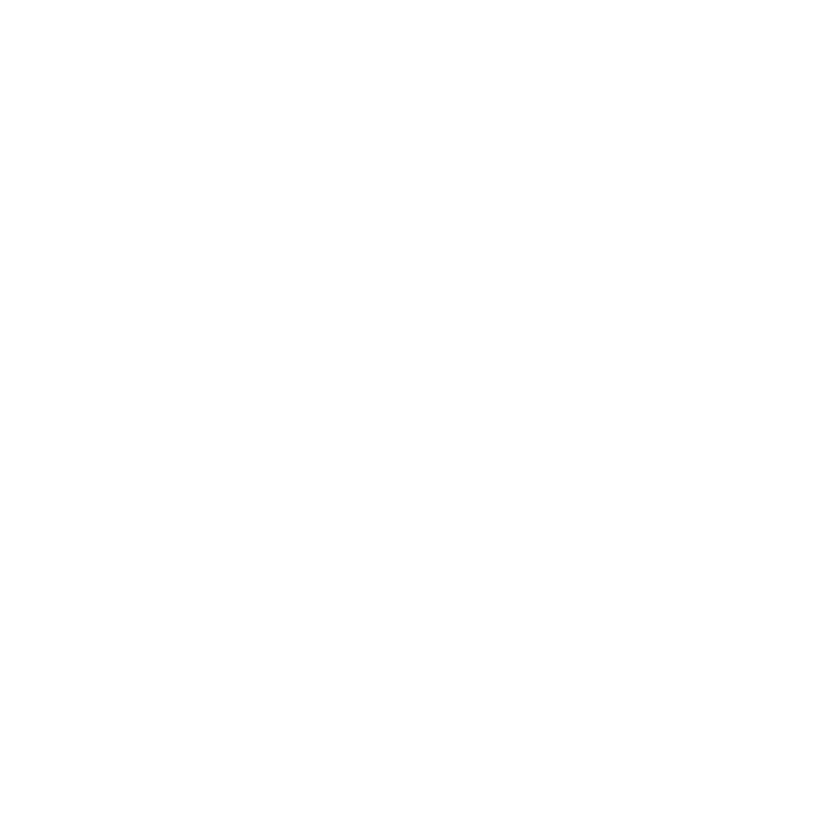

In [18]:
# To override this behavior (for e.g., to better visualize the
# density within each facet), use stat(nlevel)

d + stat_density_2d(aes(fill = stat(nlevel)), 
                    geom = "polygon") +
  facet_grid(. ~ cut) + scale_fill_viridis_c()

# object 'nlevel' not found
# Refer https://ggplot2.tidyverse.org/reference/geom_density_2d-5.png

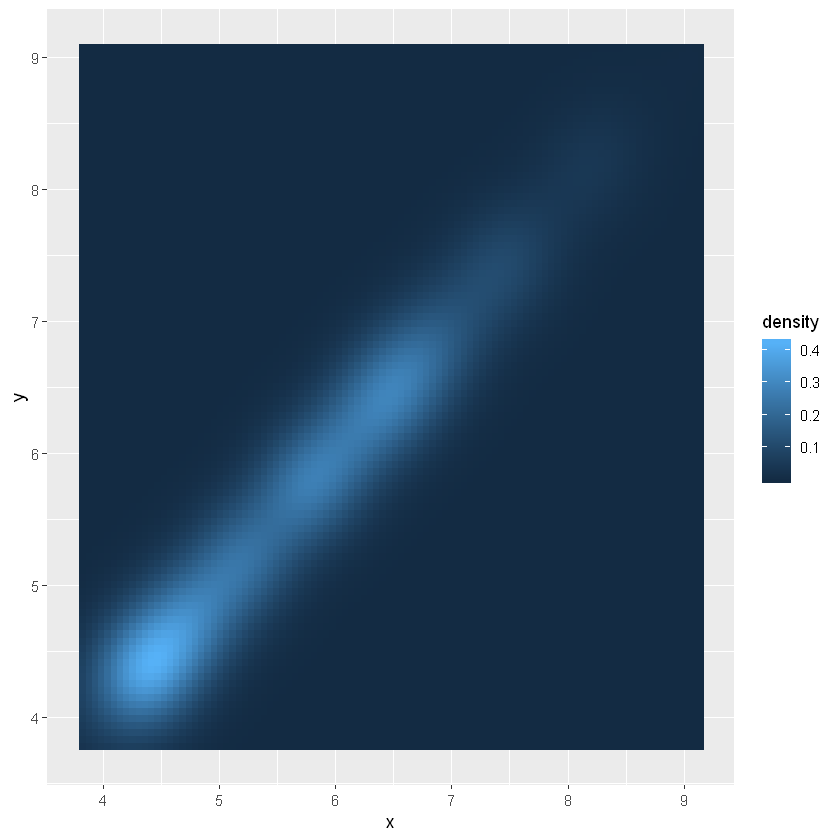

In [19]:
# If contouring's turned off, geoms can be used like tiles - 

d + stat_density_2d(geom = "raster", aes(fill = stat(density)),
                    contour = FALSE)

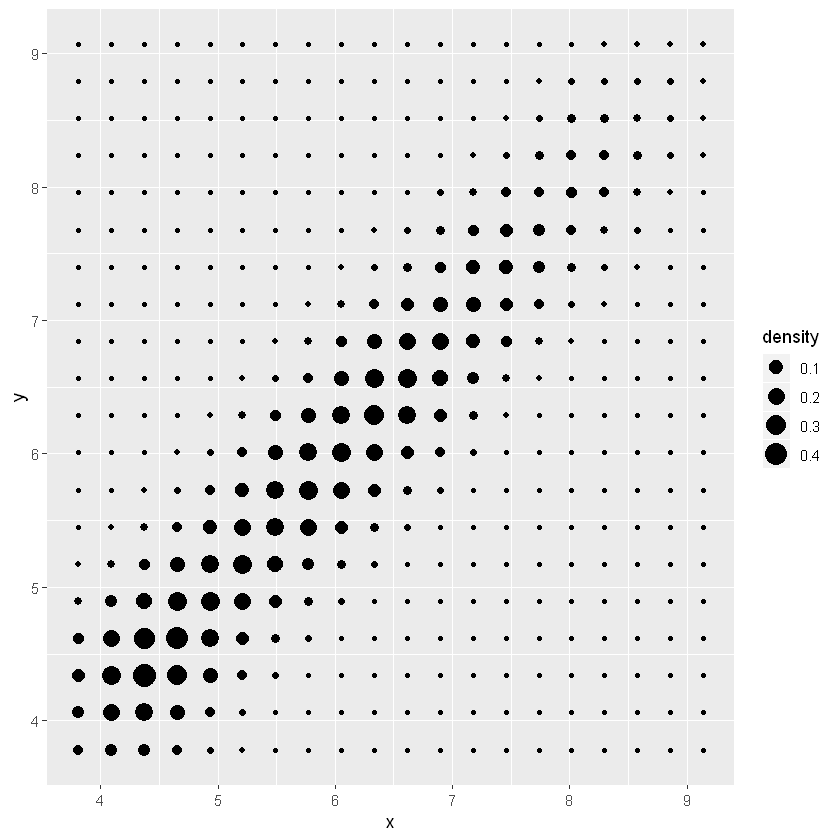

In [20]:
# Or points - 

d + stat_density_2d(geom = "point", aes(size = stat(density)),
                    n = 20, contour = FALSE)